# Godview

Prerequisite:
- knowing all possible labels
- knowing everything that happened and will happen in the video for every frame
- knowing the meanings of all labels.

In [32]:
import numpy as np
import pandas as pd

import cratutils as u
import godutils as g

import importlib
importlib.reload(u)
importlib.reload(g)

<module 'godutils' from '/Users/yx/Documents/pro/crat/godcrat/godutils.py'>

Videos is a map of filename to list

Each list represents a video (list of frames)

Each frame is a dataframe of agent information

`Map<String, List<DataFrame>> video;`

In [3]:
# # Run this only once
# u.WriteRawDataToCache(includeInvalid=True)

In [4]:
videos = u.GetCachedRawVideos()

In [5]:
importlib.reload(u)
labels = u.GetTrueLabels('0.csv')

labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 -1,
 -1,
 -1,
 2,
 2,
 2,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [6]:
videos['0.csv'][0].head()

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,V_X,V_Y,A_X,A_Y,YAW,DYAW,DDYAW,first_class,second_class,third_class,fileName
518898,1.630377e+09,ego,0,0.000000,0.000000,-0.066663,10.075352,-0.273077,0.041434,0.000000,1.718444,-0.313116,0,0,1,0.csv
518899,1.630377e+09,scene-000000-1,2,-3.956840,2.794453,-0.316424,17.446817,0.267046,0.178962,1.522354,-0.888693,-1.126752,0,0,1,0.csv
518900,1.630377e+09,scene-000000-2,2,-0.133549,-16.591239,0.300762,10.282932,-0.347223,0.073741,356.251778,6.214802,-4.810373,0,0,1,0.csv
518901,1.630377e+09,scene-000000-3,2,-4.378153,27.572297,-0.966180,16.985848,1.258668,-0.300079,2.690841,-0.663327,2.067720,0,0,1,0.csv
518902,1.630377e+09,scene-000000-4,2,-2.816514,-24.751882,-0.320676,15.035509,0.581560,-0.243673,1.445300,1.827755,-0.423362,0,0,1,0.csv


5
1.1.6 LeadVehicleAccelerating


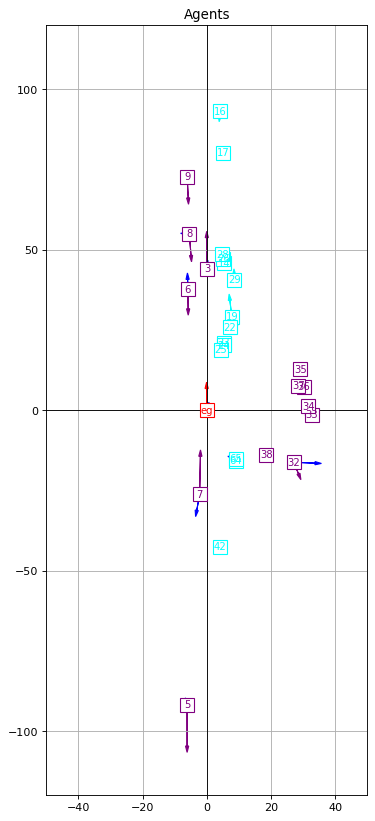

In [90]:
importlib.reload(u)
importlib.reload(g)

file = '30.csv'
vid = g.Trajectories(videos[file])
lbs = u.GetTrueLabels(file)

def isAround(agent: g.Agent, ego: g.Agent):
    if agent.isAround(ego):
        # print(agent.id, 
        #       round(agent.x-ego.x, 1), round(agent.y-ego.y, 1),
        #       round(np.arctan2(agent.y-ego.y, agent.x-ego.x)/np.pi*180, 1), round(ego.yaw/np.pi*180, 1),
              
        #       )
        return True
    return False

def laSmall(agent: g.Agent, ego: g.Agent):
    return agent.faSmall()

frameIndex = 15
egoAgent = vid.getEgo(frameIndex)
allAgents = vid.getNonEgoAgents(frameIndex)
print(lbs[frameIndex])
try: print(u.thirdClassNames[lbs[frameIndex]])
except: print("INVALID")
vid.plot(frameIndex, greenIf=isAround, showA=True, ysize=120, dpi=80)

In [118]:
a = pd.Series(['apple', 'lemon', 'mango'])
a.apply(lambda x : 'a' in x)

0     True
1    False
2     True
dtype: bool